# COVID Twitter Vaccine NLP & KMeans Clustering

The purpose of this project is to gain insight on how people felt about a COVID-19 vaccine from the dates March 15, 2020 to May 15, 2020, a two month period. Thus, you can say this is a **Sentiment Analysis**. 

To achieve this, I utilized the **twitterscraper** library to scrape a sample of around **1000 tweets (1130 to be exact)** with known pro and anti-vaccine keywords and hashtags (pro, antivax, antivaxxer, vaccineswork, etc.). I then performed **NLP** on the text data within the tweet using **NLTK** and used **SciKit-Learn** to convert the text data into vectors using **TF-IDF (Term Frequency-Inverse Document Frequency)**. Lastly, I used **KMeans clustering** to get a broad sense of how much of the tweets could be pro-vaccine or anti-vaccine, or at least understand how often these terms are used in coronavirus vaccine related tweets. 

We begin with **collecting** the tweets and saving them to csv via twitterscraper. We then **clean/process** the data, dropping uneeded columns and performing NLP on the text within the tweets. We then do a brief **EDA (Exploratory Data Analysis)** on the processed text data by using TF-IDF. Finally, we **model** the data with KMeans, both our own implementation and the SKLearn one.

Credits to **Daniel Foley** from *Towards Data Science* on Medium for the article where the TF-IDF and KMeans code is based and to **Aman** from *Unfold Data Science* on YouTube for the tutorial on NLTK and NLP. Links to these sources are below:

K-Means Clustering: Making Sense of Text Data Using Unsupervised Learning: https://towardsdatascience.com/k-means-clustering-8e1e64c1561c

Text Data Cleaning in Python | How to clean text data in python: https://www.youtube.com/watch?v=KhXU7KOxQcg&t=4s

**Index**

[Data Collection](#Data-Collection)

[Data Cleaning](#Data-Cleaning)

[Text Cleaning of text column](#Text-Cleaning-of-text-column)

- [Convert to Lowercase](#Convert-to-Lowercase)

- [Tokenization](#Tokenization)

- [Twitter Character Removal](#Twitter-Character-Removal)

- [Removing Stopwords](#Removing-Stopwords)

- [Stemming & Lemmantization](#Stemming-&-Lemmantization)

- [Fine Tuning](#Fine-Tuning)

[Exploratory-Data-Analysis](#Exploratory-Data-Analysis)

[Modeling](#Modeling)

[Results](#Results)

# Data Collection

In [1]:
#!pip install twitterscraper

In [2]:
from twitterscraper import query_tweets
import datetime as dt
import pandas as pd

begin_date = dt.date(2020,3,15)
end_date = dt.date(2020,5,15)

limit = 1000
lang = 'english'

#tweets = query_tweets('''vaccine OR vaccination 
 #                   AND coronavirus OR covid
  #                  AND pro OR antivax
   #                 OR DoctorsSpeakUp OR antivaxxer
    #                OR vaccineswork OR vaccineinjury
     #               38,97,3881''',
      #                begindate= begin_date,
       #              enddate = end_date,
        #             limit = limit,
         #            lang = lang)

INFO: {'User-Agent': 'Mozilla/5.0 (Windows; U; Windows NT 6.1; x64; fr; rv:1.9.2.13) Gecko/20101203 Firebird/3.6.13'}


In [3]:
#raw_data = pd.DataFrame(t.__dict__ for t in tweets)

#raw_data.to_csv(r'twitterdata.csv', index=False,header=True, encoding='utf-8')

In [4]:
raw_data = pd.read_csv('twitterdata.csv')
raw_data.head()

,screen_name,username,user_id,tweet_id,tweet_url,timestamp,timestamp_epochs,text,text_html,links,...,has_media,img_urls,video_url,likes,retweets,replies,is_replied,is_reply_to,parent_tweet_id,reply_to_users
0,BrownBearVK,Varun Khanna,413591528,1241139896301076482,/BrownBearVK/status/1241139896301076482,2020-03-20 23:09:45,1584745785,When they finally develop a COVID-19 vaccine.....,"<p class=""TweetTextSize js-tweet-text tweet-te...",[],...,False,[],NaN,3,0,2,True,False,NaN,[]
1,MRoyer3,Haitian State of Mind,331814554,1241121069424992256,/MRoyer3/status/1241121069424992256,2020-03-20 21:54:56,1584741296,I dont see how there's pro sports (even in emp...,"<p class=""TweetTextSize js-tweet-text tweet-te...",[],...,False,[],NaN,1,0,0,False,False,NaN,[]
2,MbMazur,Mb Mazur,926995890212167681,1241089563440885761,/MbMazur/status/1241089563440885761,2020-03-20 19:49:44,1584733784,"Dear Anti-Vaxxers,\n\nAre you enjoying the vac...","<p class=""TweetTextSize js-tweet-text tweet-te...",[],...,False,[],NaN,4,1,0,False,False,NaN,[]
3,queen_v1,Victoria Volynsky,44719993,1241086399341899776,/queen_v1/status/1241086399341899776,2020-03-20 19:37:10,1584733030,"When the Coronavirus vaccine is developed, wha...","<p class=""TweetTextSize js-tweet-text tweet-te...",[],...,False,[],NaN,0,0,0,False,False,NaN,[]
4,bigpatty69,Patrick Brown,1217594134732705792,1241056092014206978,/bigpatty69/status/1241056092014206978,2020-03-20 17:36:44,1584725804,If they every make a vaccine for coronavirus I...,"<p class=""TweetTextSize js-tweet-text tweet-te...",[],...,False,[],NaN,4,0,3,True,False,NaN,[]


# Data Cleaning

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
% matplotlib inline

UsageError: Line magic function `%` not found.


In [6]:
# remove unneeded columns

cols = ['screen_name', 'username', 'user_id', 'tweet_id', 'tweet_url',
       'timestamp_epochs','text_html', 'links', 'has_media', 'img_urls',
       'video_url', 'replies', 'is_replied', 'is_reply_to', 'parent_tweet_id',
       'reply_to_users']
data = raw_data.drop(cols, axis=1)
data.head(20)

,timestamp,text,hashtags,likes,retweets
0,2020-03-20 23:09:45,When they finally develop a COVID-19 vaccine.....,['VaccinesWork'],3,0
1,2020-03-20 21:54:56,I dont see how there's pro sports (even in emp...,[],1,0
2,2020-03-20 19:49:44,"Dear Anti-Vaxxers,\n\nAre you enjoying the vac...","['covid19', 'coronavirus', 'antivax']",4,1
3,2020-03-20 19:37:10,"When the Coronavirus vaccine is developed, wha...","['antivax', 'antivaxxers']",0,0
4,2020-03-20 17:36:44,If they every make a vaccine for coronavirus I...,"['antivax', 'coronavirus', 'vaccines']",4,0
5,2020-03-20 16:40:34,If volunteers are needed for #vaccine testing ...,"['vaccine', 'coronavirus', 'Covid_19', 'virus'...",0,0
6,2020-03-20 16:26:52,Very proud of you @UniofOxford @oxfordalumni @...,"['vaccine', 'VaccinesWork', 'CoronaVirusUpdate...",0,0
7,2020-03-20 16:18:33,Very proud of you @UniofOxford @oxfordalumni @...,"['vaccine', 'VaccinesWork', 'CoronaVirusUpdate...",1,1
8,2020-03-20 14:52:18,“5G network used to push the Coronavirus vacci...,"['vaxxhappened', 'antivax', 'antivaxxpic']",0,0
9,2020-03-20 14:28:54,Let's face it social distancing just buys time...,['ldnont'],0,1


In [7]:
# drop duplicates from rows 

# before 
print('before:', data.shape)

# data.duplicated(subset=None, keep='first')
#  typeerror: lists are unhashaabsble
data.loc[data.astype(str).drop_duplicates().index]

print('after:', data.shape)

before: (1130, 5)
after: (1130, 5)


In [8]:
# changing timestamp column to DateTime column

data['timestamp'] = pd.to_datetime(data['timestamp'])

data.head()

,timestamp,text,hashtags,likes,retweets
0,2020-03-20 23:09:45,When they finally develop a COVID-19 vaccine.....,['VaccinesWork'],3,0
1,2020-03-20 21:54:56,I dont see how there's pro sports (even in emp...,[],1,0
2,2020-03-20 19:49:44,"Dear Anti-Vaxxers,\n\nAre you enjoying the vac...","['covid19', 'coronavirus', 'antivax']",4,1
3,2020-03-20 19:37:10,"When the Coronavirus vaccine is developed, wha...","['antivax', 'antivaxxers']",0,0
4,2020-03-20 17:36:44,If they every make a vaccine for coronavirus I...,"['antivax', 'coronavirus', 'vaccines']",4,0


In [9]:
# checking data types of columns

data.dtypes

timestamp    datetime64[ns]
text                 object
hashtags             object
likes                 int64
retweets              int64
dtype: object

## Text Cleaning of text column

In [10]:
import warnings
warnings.filterwarnings('ignore')

import nltk
#nltk.download()

### Convert to Lowercase

In [11]:
# Convert to lowercase

import string

data['text'] = [text.lower() for text in data['text']]
data['hashtags'] = pd.Series([text.lower() for tag in data['hashtags'] for text in tag])

print(data['text'])
print(data['hashtags'])

0       when they finally develop a covid-19 vaccine.....
1       i dont see how there's pro sports (even in emp...
2       dear anti-vaxxers,\n\nare you enjoying the vac...
3       when the coronavirus vaccine is developed, wha...
4       if they every make a vaccine for coronavirus i...
                              ...                        
1125    when the coronavirus vaccine comes out\n\ni’m ...
1126    so if the antivax people don’t take the eventu...
1127    14 may 1796, dr edward jenner inoculates 8 y/o...
1128    anti-vaccine movement could undermine efforts ...
1129    antivax movement & covid-19 \n“an extrapolatio...
Name: text, Length: 1130, dtype: object
0       [
1       '
2       v
3       a
4       c
       ..
1125    '
1126    ,
1127     
1128    '
1129    c
Name: hashtags, Length: 1130, dtype: object


### Tokenization

In [12]:
# word tokenization

from nltk.tokenize import word_tokenize
token_text = [word_tokenize(text) for text in data['text']]
print(token_text)

print('-------------------------------------------')

# sentence tokenization

from nltk.tokenize import sent_tokenize
sent_token = [sent_tokenize(text) for text in data['text']]
print(sent_token)

[['when', 'they', 'finally', 'develop', 'a', 'covid-19', 'vaccine', '...', '...', 'what', 'are', 'anti-vaxxers', 'going', 'to', 'do', '?', '#', 'vaccineswork'], ['i', 'dont', 'see', 'how', 'there', "'s", 'pro', 'sports', '(', 'even', 'in', 'empty', 'venues', ')', 'until', 'there', "'s", 'a', 'covid-19', 'vaccine', '.', 'im', 'sure', 'some', 'pro', 'leagues', 'will', 'try', ',', 'but', 'all', 'it', 'takes', 'is', '1', 'athlete', 'testing', 'positive', 'and', 'their', 'entire', 'league', 'has', 'to', 'shut', 'down', 'again', '.'], ['dear', 'anti-vaxxers', ',', 'are', 'you', 'enjoying', 'the', 'vaccine-free', 'world', '?', 'signed', ',', 'everyone', 'else', 'with', 'a', 'brain', '#', 'covid19', '#', 'coronavirus', '#', 'antivax'], ['when', 'the', 'coronavirus', 'vaccine', 'is', 'developed', ',', 'what', 'will', 'all', 'the', 'anti-vaxxers', 'do', '?', 'or', 'will', 'it', 'become', 'a', 'dead', 'subject', '?', '#', 'antivax', '#', 'antivaxxers'], ['if', 'they', 'every', 'make', 'a', 'vacci

[['when they finally develop a covid-19 vaccine...\n\n... what are anti-vaxxers going to do?', '#vaccineswork'], ["i dont see how there's pro sports (even in empty venues) until there's a covid-19 vaccine.", 'im sure some pro leagues will try,but all it takes is 1 athlete testing positive and their entire league has to shut down again.'], ['dear anti-vaxxers,\n\nare you enjoying the vaccine-free world?', 'signed,\neveryone else with a brain\n\n#covid19 #coronavirus #antivax'], ['when the coronavirus vaccine is developed, what will all the anti-vaxxers do?', 'or will it become a dead subject?', '#antivax #antivaxxers'], ['if they every make a vaccine for coronavirus i refuse to give it to my kids.', 'all they need are my essential oils, crystals, and prayer.', '#antivax #coronavirus #vaccines'], ['if volunteers are needed for #vaccine testing for #coronavirus sign me up.', 'anything to help crack the code and get something to help the masses.', '#covid_19 #virus #fridaythoughts #doctors

### Twitter Character Removal

In [13]:
# remove punctuation 

import re

# reg strips URL, punctuations, usernames, 
# and non alphanumeric characters. 
# Also separates words into single space

reg = re.compile('(@[a-z0-9]+)|([^0-9a-z \t])|(\w+:\/\/\S+)')

no_punc = []

for filt in token_text:
    review = []
    for token in filt:
        new_token = reg.sub(u'', token)
        if not new_token == u'':
            review.append(new_token)
    no_punc.append(review)
    
print(no_punc)

[['when', 'they', 'finally', 'develop', 'a', 'covid19', 'vaccine', 'what', 'are', 'antivaxxers', 'going', 'to', 'do', 'vaccineswork'], ['i', 'dont', 'see', 'how', 'there', 's', 'pro', 'sports', 'even', 'in', 'empty', 'venues', 'until', 'there', 's', 'a', 'covid19', 'vaccine', 'im', 'sure', 'some', 'pro', 'leagues', 'will', 'try', 'but', 'all', 'it', 'takes', 'is', '1', 'athlete', 'testing', 'positive', 'and', 'their', 'entire', 'league', 'has', 'to', 'shut', 'down', 'again'], ['dear', 'antivaxxers', 'are', 'you', 'enjoying', 'the', 'vaccinefree', 'world', 'signed', 'everyone', 'else', 'with', 'a', 'brain', 'covid19', 'coronavirus', 'antivax'], ['when', 'the', 'coronavirus', 'vaccine', 'is', 'developed', 'what', 'will', 'all', 'the', 'antivaxxers', 'do', 'or', 'will', 'it', 'become', 'a', 'dead', 'subject', 'antivax', 'antivaxxers'], ['if', 'they', 'every', 'make', 'a', 'vaccine', 'for', 'coronavirus', 'i', 'refuse', 'to', 'give', 'it', 'to', 'my', 'kids', 'all', 'they', 'need', 'are', 

### Removing Stopwords

In [14]:
# Removing the stopwords
from nltk.corpus import stopwords

no_stop = []

for text in no_punc:
    new_term_vector = []
    for word in text:
        if not word in stopwords.words('english'):
            new_term_vector.append(word)
            
    no_stop.append(new_term_vector)
    
print(no_stop)

[['finally', 'develop', 'covid19', 'vaccine', 'antivaxxers', 'going', 'vaccineswork'], ['dont', 'see', 'pro', 'sports', 'even', 'empty', 'venues', 'covid19', 'vaccine', 'im', 'sure', 'pro', 'leagues', 'try', 'takes', '1', 'athlete', 'testing', 'positive', 'entire', 'league', 'shut'], ['dear', 'antivaxxers', 'enjoying', 'vaccinefree', 'world', 'signed', 'everyone', 'else', 'brain', 'covid19', 'coronavirus', 'antivax'], ['coronavirus', 'vaccine', 'developed', 'antivaxxers', 'become', 'dead', 'subject', 'antivax', 'antivaxxers'], ['every', 'make', 'vaccine', 'coronavirus', 'refuse', 'give', 'kids', 'need', 'essential', 'oils', 'crystals', 'prayer', 'antivax', 'coronavirus', 'vaccines'], ['volunteers', 'needed', 'vaccine', 'testing', 'coronavirus', 'sign', 'anything', 'help', 'crack', 'code', 'get', 'something', 'help', 'masses', 'covid19', 'virus', 'fridaythoughts', 'doctorsspeakup', 'doctors', 'immunity', 'protection', 'socialdistanacing'], ['proud', 'uniofoxford', 'oxfordalumni', 'oxfor

## Stemming & Lemmantization

In [15]:
# Stemming and Lemmatizing

from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

pstem = PorterStemmer()
wlem = WordNetLemmatizer()

preproc_text = []

for text in no_stop:
    final_text = []
    for word in text:
        pstem.stem(word)
        final_text.append(wlem.lemmatize(word))
    
    preproc_text.append(final_text)
    
print(preproc_text)

[['finally', 'develop', 'covid19', 'vaccine', 'antivaxxers', 'going', 'vaccineswork'], ['dont', 'see', 'pro', 'sport', 'even', 'empty', 'venue', 'covid19', 'vaccine', 'im', 'sure', 'pro', 'league', 'try', 'take', '1', 'athlete', 'testing', 'positive', 'entire', 'league', 'shut'], ['dear', 'antivaxxers', 'enjoying', 'vaccinefree', 'world', 'signed', 'everyone', 'else', 'brain', 'covid19', 'coronavirus', 'antivax'], ['coronavirus', 'vaccine', 'developed', 'antivaxxers', 'become', 'dead', 'subject', 'antivax', 'antivaxxers'], ['every', 'make', 'vaccine', 'coronavirus', 'refuse', 'give', 'kid', 'need', 'essential', 'oil', 'crystal', 'prayer', 'antivax', 'coronavirus', 'vaccine'], ['volunteer', 'needed', 'vaccine', 'testing', 'coronavirus', 'sign', 'anything', 'help', 'crack', 'code', 'get', 'something', 'help', 'mass', 'covid19', 'virus', 'fridaythoughts', 'doctorsspeakup', 'doctor', 'immunity', 'protection', 'socialdistanacing'], ['proud', 'uniofoxford', 'oxfordalumni', 'oxfordmedsci', 'v

### Fine Tuning

In [16]:
# remove web terms like http, html, etc.

reg = re.compile(r'(http)|(^www)|(html$)|(\w*\d{3,}\w*)')

tuned_text = []

for filt in preproc_text:
    review = []
    for token in filt:
        new_token = reg.sub(u'', token)
        if not new_token == u'':
            review.append(new_token)
    tuned_text.append(review)
    
print(tuned_text)
#print(preproc_text)

[['finally', 'develop', 'covid19', 'vaccine', 'antivaxxers', 'going', 'vaccineswork'], ['dont', 'see', 'pro', 'sport', 'even', 'empty', 'venue', 'covid19', 'vaccine', 'im', 'sure', 'pro', 'league', 'try', 'take', '1', 'athlete', 'testing', 'positive', 'entire', 'league', 'shut'], ['dear', 'antivaxxers', 'enjoying', 'vaccinefree', 'world', 'signed', 'everyone', 'else', 'brain', 'covid19', 'coronavirus', 'antivax'], ['coronavirus', 'vaccine', 'developed', 'antivaxxers', 'become', 'dead', 'subject', 'antivax', 'antivaxxers'], ['every', 'make', 'vaccine', 'coronavirus', 'refuse', 'give', 'kid', 'need', 'essential', 'oil', 'crystal', 'prayer', 'antivax', 'coronavirus', 'vaccine'], ['volunteer', 'needed', 'vaccine', 'testing', 'coronavirus', 'sign', 'anything', 'help', 'crack', 'code', 'get', 'something', 'help', 'mass', 'covid19', 'virus', 'fridaythoughts', 'doctorsspeakup', 'doctor', 'immunity', 'protection', 'socialdistanacing'], ['proud', 'uniofoxford', 'oxfordalumni', 'oxfordmedsci', 'v

In [17]:
# create final dataset

cleaned_data = data.copy()

new_col = pd.Series(tuned_text)
cleaned_data['text'] = new_col
cleaned_data.head()

,timestamp,text,hashtags,likes,retweets
0,2020-03-20 23:09:45,"[finally, develop, covid19, vaccine, antivaxxe...",[,3,0
1,2020-03-20 21:54:56,"[dont, see, pro, sport, even, empty, venue, co...",',1,0
2,2020-03-20 19:49:44,"[dear, antivaxxers, enjoying, vaccinefree, wor...",v,4,1
3,2020-03-20 19:37:10,"[coronavirus, vaccine, developed, antivaxxers,...",a,0,0
4,2020-03-20 17:36:44,"[every, make, vaccine, coronavirus, refuse, gi...",c,4,0


# Exploratory Data Analysis

## Term Frequency-Inverse Document Frequency (TF-IDF)

From Wikipedia, TF-IDF "...is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus." In this case, TF-IDF will allow us to gain insight into how important certain words are in a single tweet but also relative to the rest of the tweets in the dataset.

In [18]:
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer as tfi
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.metrics import pairwise_distances

tf_idf_vect = tfi(stop_words = 'english',
                 max_features = 20)

x = cleaned_data['text']

#data = [tweets.strip() for tweets in cleaned_data['text']]
#texts = [[word.lower() for word in tweet.split()]]
         
tf_idf = tf_idf_vect.fit_transform([' '.join(tweet) for tweet in x])
tf_idf_norm = normalize(tf_idf)
tf_idf_array = tf_idf_norm.toarray()

vector = pd.DataFrame(tf_idf_array,
                     columns = tf_idf_vect.get_feature_names())
vector.head()

,antivax,antivaxxer,antivaxxers,come,coronavirus,covid,covid19,flu,going,like,need,nt,people,pro,say,vaccination,vaccine,vaccineswork,virus,world
0,0.000000,0.0,0.622278,0.0,0.000000,0.0,0.281777,0.0,0.638364,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.186374,0.301875,0.0,0.000000
1,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.305571,0.0,0.000000,0.0,0.00000,0.0,0.0,0.930472,0.0,0.0,0.202111,0.000000,0.0,0.000000
2,0.408615,0.0,0.581070,0.0,0.255675,0.0,0.263118,0.0,0.000000,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.600659
3,0.321715,0.0,0.914988,0.0,0.201301,0.0,0.000000,0.0,0.000000,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.137020,0.000000,0.0,0.000000
4,0.428905,0.0,0.000000,0.0,0.536741,0.0,0.000000,0.0,0.000000,0.0,0.62807,0.0,0.0,0.000000,0.0,0.0,0.365347,0.000000,0.0,0.000000


By setting max_features to 20, we can see that the **top 20 most frequent words** in the tweets of our dataset are different antivaxxer terms, coronavirus related terms, and various terms regarding vaccines

In [19]:
vector.describe()

,antivax,antivaxxer,antivaxxers,come,coronavirus,covid,covid19,flu,going,like,need,nt,people,pro,say,vaccination,vaccine,vaccineswork,virus,world
count,1130.000000,1130.000000,1130.000000,1130.000000,1130.000000,1130.000000,1130.000000,1130.000000,1130.000000,1130.000000,1130.000000,1130.000000,1130.000000,1130.000000,1130.000000,1130.000000,1130.000000,1130.000000,1130.000000,1130.000000
mean,0.112104,0.056060,0.042977,0.032222,0.212284,0.109080,0.228484,0.035446,0.039898,0.041404,0.036898,0.049080,0.054450,0.116896,0.033582,0.070121,0.306815,0.198481,0.033857,0.036353
std,0.234766,0.185879,0.164274,0.135137,0.226382,0.220180,0.254098,0.149709,0.160489,0.153790,0.148625,0.169493,0.173741,0.241090,0.145069,0.207875,0.176245,0.238956,0.145883,0.148323
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.189588,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.199349,0.000000,0.184047,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.290758,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.379826,0.000000,0.420793,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.413720,0.404078,0.000000,0.000000
max,1.000000,0.867702,0.939674,0.821813,0.839266,0.924339,0.922086,0.891971,0.943561,0.829675,0.859295,0.955983,0.898318,0.976980,0.894199,0.936292,0.804392,0.740703,0.949624,0.901996


I found being able to use the .describe() method on this dataset interesting because now we have summary statistics for the top 20 words in our dataset. Some findings to note include that both pro and antivax were on average found in about **11.5%** of our tweets with a near identical standard deviation, and terms like coronavirus and covid19 were on average found in about **21-22%** of the dataset.

# Modeling

The unsupervised learning algorithms used for this analysis include Latent Dirichlet Allocation (LDA) and Non-negative Matrix Factorization (NMF) for topic modeling, and K-means for clustering of tweets. Conveniently, all three are available in Python's scikit-learn package.

The following code is an implementation of KMeans from Daniel Foley's article typed out for learning purposes to understand what KMeans is doing.

To implement K-Means, we need to follow these steps:

- initialize_centroids 
- assign_clusters
- update_centroids
- fit_kmeans
- predict

In [20]:
# Credits to Daniel Foley from towarddatascience.com "K-Means Clustering"
# https://towardsdatascience.com/k-means-clustering-8e1e64c1561c

class Kmeans:
    ''' K Means Clustering
    
    Parameters
    -------------------
        k: int, # of clusters
        
        seed: int, will be randomly set if None
        
        max_iter: int, number of iterations to run algorithms, default: 200
        
    Attributes
    ------------------
        centroids: array, k, number_features
        
        cluster_labels: label for each data point
        
    '''
    
    def __init__(self, k, seed = None, max_iter = 200):
        self.k = k
        self.seed = seed
        if self.seed is not None:
            np.random.seed(self.seed)
        self.max_iter = max_iter
        
    def intialize_centroids(self,data):
        
        '''Randomly Initialize Centroids
        
        Parameters
        --------------
        data: array or matrix, number_rows, number_features
        
        Returns
        -------------
        centroids: array of k centroids chosen as random data points
        '''
        
        initial_centroids = np.random.permutation(data.shape[0])[:self.k]
        self.centroids = data[initial_centroids]
        
        return self.centroids
    
    def assign_clusters(self,data):
        '''Compute distance of data from clusters and assign data point 
        to closest cluster.
        
        Parameters 
        ------------
        data: array or matrix, number_rows, number_features
        
        Returns 
        ------------
        cluster_labels: index which minimizes the distance of data to each cluster
        
        '''
        
        if data.ndim == 1:
            data = data.reshape(-1,1)
            
        dist_to_centroid = pairwise_distances(data,self.centroids, metric = 'euclidean')
        self.cluster_labels = np.argmin(dist_to_centroid, axis = 1)
        
        return self.cluster_labels
    
    def update_centroids(self,data):
        '''Computes average of all data points in cluster and assigns 
           new centroids as average of data points
           
           Parameters
           -------------
           data: array or matirx, number_rows, number_features
           
           Returns
           -------------
           centroids: array, k, number_features
           '''
        
        self.centroids = np.array([data[self.cluster_labels == i].mean(axis = 0) for i in range(self.k)])
        return self.centroids
    
    def predict(self,data):
        '''Predict which cluster data point belongs to
        
        Parameters
        --------------
        data: array or matirx, number_rows, number_features
        
        Returns
        -------------
        cluster_labels: index which minimizes the distance of data to each
        cluster
        '''
        
        return self.assign_clusters(data)
    
    def fit_kmeans(self, data):
        '''
        This function contains the main loop to fit the algorithm
        Implements initialize centroids and update_centroids according 
        to max_iter
        ---------------------
        
        Returns
        ------------
        instance of kmeans class
        
        '''
        self.centroids = self.intialize_centroids(data)
        
        # Main kmeans loop
        for iter in range(self.max_iter):
            self.cluster_labels = self.assign_clusters(data)
            self.centroids = self.update_centroids(data)
            if iter % 100 == 0:
                print('Running Model Iteration %d ' %iter)
        print('Model finished running')
        return self

## Own Implementation vs. SKlearn

Running Model Iteration 0 
Running Model Iteration 100 
Running Model Iteration 200 
Running Model Iteration 300 
Running Model Iteration 400 
Running Model Iteration 500 
Model finished running


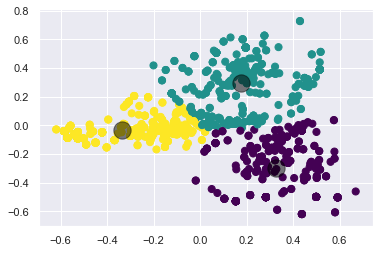

In [21]:
# Own Impementation

sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)
test_e = Kmeans(3, 1, 600)
fitted = test_e.fit_kmeans(Y_sklearn)
predicted_values = test_e.predict(Y_sklearn)

plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], c=predicted_values, s=50, cmap='viridis')

centers = fitted.centroids
plt.scatter(centers[:, 0], centers[:, 1],c='black', s=300, alpha=0.5)

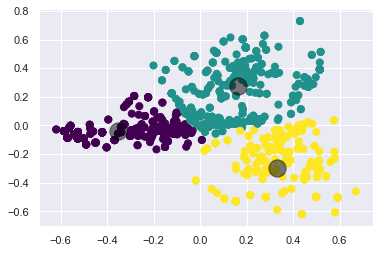

In [24]:
# SKlearn implementation

sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)
kmeans = KMeans(n_clusters=3, max_iter=600, algorithm = 'auto') 
fitted = kmeans.fit(Y_sklearn)
prediction = kmeans.predict(Y_sklearn)

skcenters = fitted.cluster_centers_

plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], c=prediction, s=50, cmap='viridis')
plt.scatter(skcenters[:, 0], skcenters[:, 1], c='black', s=300, alpha=0.5)

As we can see, the SKLearn implementation results in the same clustering visualization that our own class produced, just with a different color schema. Initially, I declared n_clusters (number of clusters) as 4 for experimental purposes, but the next cell, which seeks the optimal number of clusters using the Elbow Method, will show that the best number of clusters is 3. I shall upload the results of n_clusters = 4 at a later date.

Below, from Daniel Foley's Article, the **Elbow Method** "...involves estimating the model using various numbers of clusters and calculating the negative of the within-cluster sum of squares for each number of clusters chosen using the score method from sklearn." The result graph from this technique looks like an elbow, and the optimal number of clusters is where the elbow forms, in our case 3.

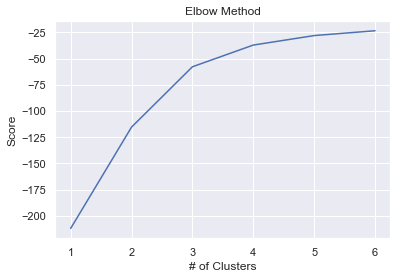

In [25]:
# find out ideal number of clusters using Elbow Method
num_clusters = range(1, 7)

kmeans = [KMeans(n_clusters=i, max_iter = 600) for i in num_clusters]
kmeans

score = [kmeans[i].fit(Y_sklearn).score(Y_sklearn) for i in range(len(kmeans))]
score

plt.plot(num_clusters, score)
plt.xlabel('# of Clusters')
plt.ylabel('Score')
plt.title('Elbow Method')
plt.show()

## Top Words in Each Cluster

Finally, we shall see how KMeans divided our tweets into clusters by using a function that retrieves the features (words) with the highest mean TF_IDF scores in each cluster.

In [26]:
# function that identifies the features with the highest mean tf_idf 
# scores across each cluster
def get_top_feats_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        feats = tf_idf_vect.get_feature_names()
        best_feats = [(feats[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_feats, columns = ['features', 'score'])
        dfs.append(df)
    return dfs

dfs = get_top_feats_cluster(tf_idf_array, prediction, 15)

### Cluster 1 

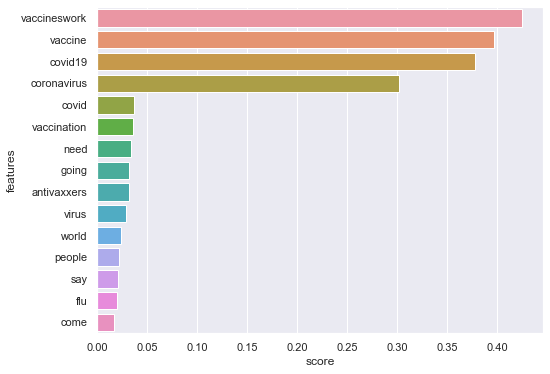

In [27]:
plt.figure(figsize=(8,6))
sns.barplot(x='score', y='features',data=dfs[0][:15]);

### Cluster 2

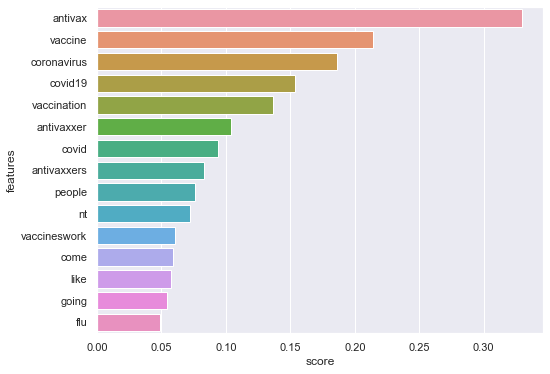

In [28]:
plt.figure(figsize=(8,6))
sns.barplot(x='score', y='features',data=dfs[1][:15]);

### Cluster 3

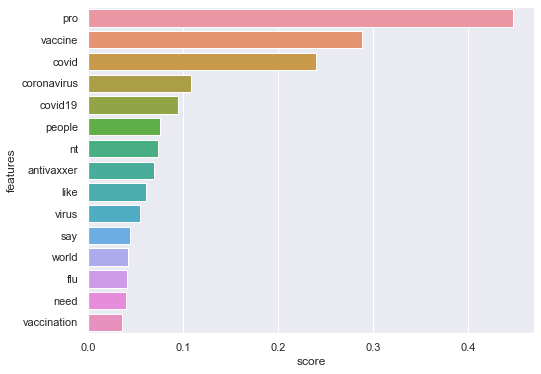

In [29]:
plt.figure(figsize=(8,6))
sns.barplot(x='score', y='features',data=dfs[2][:15]);

# Results

It seems that our first cluster contains general coronavirus and vaccine tweets, our second contains most of the antivaxxer tweets, and our third cluster contains most of the pro vaccine tweets. One can draw various conclusions from this like the following:

- The second cluster contains tweets from true antivaxxers or people who **feel negatively** about a coronavirus vaccine while the third contains the opposite, those who **feel positively or support** a vaccine.
- The biggest cluster seems to be the first one because it's **first four features reach a score at or past 0.3** while the second and third are skewed towards antivax or pro.

It would be curious to see how K-Means would have generated the clusters if n_clusters = 4.

In [31]:
# save cluster to csv
for i, df in enumerate(dfs):
    df.to_csv('twitterdf_' + str(i) + '_updated.csv')

# Conclusion

The Coronavirus pandemic has reinvograted the debate on vaccines, and the sentiment analysis performed on these tweets from the beginning of the pandemic in the United States shows this. Below is a plot of the top features from each cluster, showing that the vaccine was a hot topic at that time, and since we're still in the midst of this pandemic, it most likely still is.

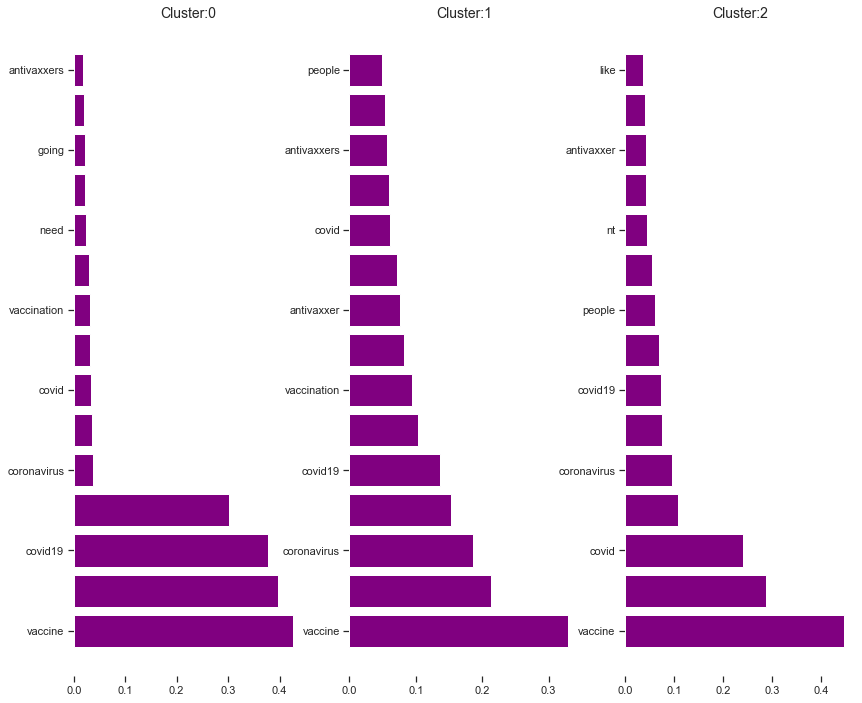

In [32]:
def plot_features(dfs):
    fig = plt.figure(figsize=(14,12))
    x = np.arange(len(dfs[0]))
    for i, df in enumerate(dfs):
        ax = fig.add_subplot(1, len(dfs), i+1)
        ax.set_title('Cluster:' + str(i), fontsize=14)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.set_frame_on(False)
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()
        ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
        ax.barh(x, df.score, align='center', color='purple')
        yticks = ax.set_yticklabels(df.features)
    plt.show();
plot_features(dfs)